# Lecture 4
## Discrete Dynamical Systems

A discrete dynamical system follows the form:
$$u_{n+1} = \text{model}(u_n, n)$$

One example may be ecological models, which use the map to describe the growth of a population with a carrying capacity of 1 and a growth rate r:

$$u_{n+1} = ru_n(1-u_n)$$

In [47]:
function ecological_model(u_n, r)
    return r*u_n*(1-u_n)
end

function model(u0,r, tsteps)
    t = 0
    u_data = []
    u_n = u0
    while t < tsteps
        u_n = ecological_model(u_n, r)
        t += 1
        append!(u_data, u_n)
    end
    
    return u_data
end

model (generic function with 1 method)

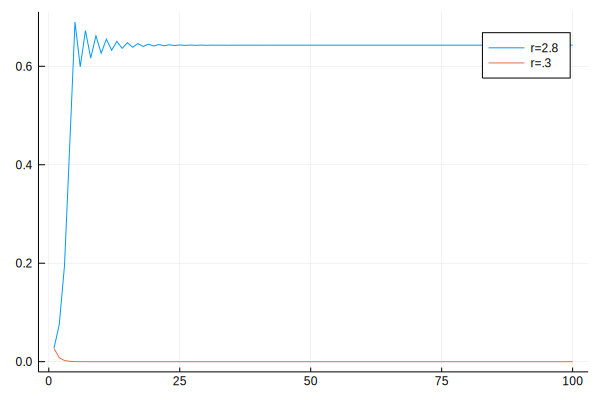

In [48]:
using Plots
plot(1:100, model(.01, 2.8, 100), label="r=2.8")
plot!(1:100, model(.9, .3, 100), label="r=.3")

Another discrete dynamical model is a time series model. These are seen in financial forecasting. The linear autoregressive model (AR1) is represented by: where $\epsilon$ is a standard normal random number

$$u_{n+1} = \alpha u_n + \epsilon_n$$

The AR(k) model allows itself to update using delays as well:
$$u_{n+1}=\sum_{j=0}^{k-1} \alpha_{j} u_{n-j}+\epsilon_{n}$$

The ARMA model uses delays on the randomness as well:
$$u_{n+1}=\sum_{j=0}^{k-1}\left(\alpha_{j} u_{n-j}+\beta_{j} \epsilon_{n-j}\right)$$

# AR(k) Model

In [59]:
function ARk(u_n, ⍺, k)
    #updating using k delays...
    #u_n is a vector.
    sum = 0
    for i in 1:k
        index = k-i+1
        sum += u_n[index]*⍺ - rand()
    end
    return sum
end

ARk (generic function with 2 methods)

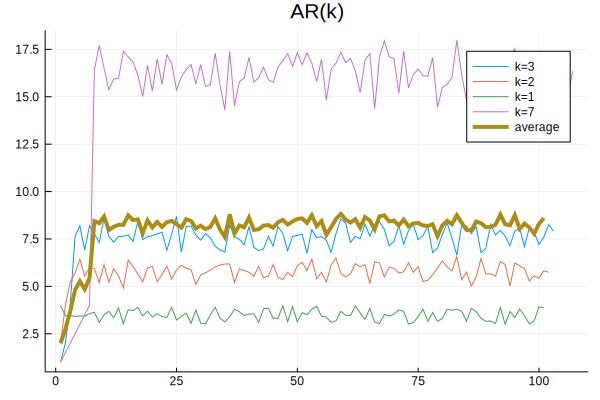

In [105]:
uN3 = [1.0, 2.0, 4.0]
k = 3
⍺ = 1
timesteps = 100


for t in 1:timesteps
    append!(uN3, ARk(uN, ⍺, k))
end
plot(1:103, uN3, label="k=3")



uN2 = [2.0, 4.0]
k = 2
⍺ = 1
timesteps = 100


for t in 1:timesteps
    append!(uN2, ARk(uN, ⍺, k))
end
plot!(1:102, uN2, label="k=2")




uN1 = [4.0]
k = 1
⍺ = 1
timesteps = 100
for t in 1:timesteps
    append!(uN1, ARk(uN, ⍺, k))
end
plot!(1:101, uN1, label="k=1")


uN7 = [1.0, 1.5, 2.0,2.5, 3.0, 3.5, 4.0]
k = 7
⍺ = 1
timesteps = 100


for t in 1:timesteps
    append!(uN7, ARk(uN, ⍺, k))
end
plot!(1:107, uN7, label="k=7")


meann = (uN1[1:101] .+ uN2[1:101] .+ uN3[1:101] .+uN7[1:101])/4
plot!(1:101, meann, label="average", linewidth=4, title="AR(k)")

Another embodiement of a discrete dynamical system is a Reccurent Neural Network, RNN. In its simplest form, a RNN is a system of the form: where $f$ is a neural network prameterized by $\theta$
$$u_{n+1} = u_n + f(u_n, \theta)$$

In [119]:
#A general system solver, where f is a function that updates u based on previous u and params.
#n steps.
function solve_system(f,u0,p,n)
    u = u0
    u_data = []
    for i in 1:n-1
        append!(u_data, [u])
        u=f(u,p)   
    end
    return u_data
end

solve_system (generic function with 1 method)

In [137]:
function lorenz(u,p)
    α,σ,ρ,β = p
    α,σ,ρ,β = p
    du1 = u[1] + α*(σ*(u[2]-u[1]))
    du2 = u[2] + α*(u[1]*(ρ-u[3]) - u[2])
    du3 = u[3] + α*(u[1]*u[2] - β*u[3])
    [du1,du2,du3]
end
p = (0.02,10.0,28.0,8/3)
solution = solve_system(lorenz,[1.0,0.0,0.0],p,6000)

5999-element Array{Any,1}:
 [1.0, 0.0, 0.0]                                              
 [0.8, 0.56, 0.0]                                             
 [0.752, 0.9968000000000001, 0.008960000000000001]            
 [0.80096, 1.3978492416000001, 0.023474005333333336]          
 [0.92033784832, 1.8180538219817644, 0.04461448495326095]     
 [1.099881043052353, 2.296260732619613, 0.07569952060880669]  
 [1.339156980965805, 2.864603692722823, 0.12217448583728006]  
 [1.6442463233172087, 3.5539673118971193, 0.19238159391549564]
 [2.026190521033191, 4.397339452147425, 0.2989931959555302]   
 [2.5004203072560376, 5.431943011293093, 0.4612438424853632]  
 [3.0867248480634486, 6.700473453723668, 0.7082869831520391]  
 [3.8094745691954923, 8.25130415895562, 1.0841620354518975]   
 [4.697840487147518, 10.136982080467158, 1.655002727352565]   
 ⋮                                                            
 [-4.625205198068402, -3.4809682773191617, 24.478704445612653]
 [-4.396357813918554, -3.737

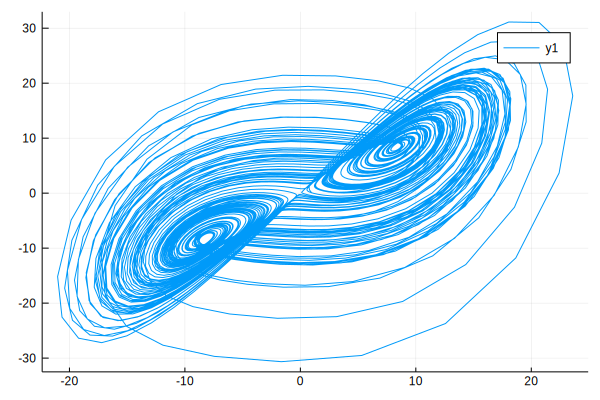

In [138]:
x = []
y = []
z = []
for i in 1:length(solution)
    element = solution[i]
    append!(x, element[1])
    append!(y, element[2])
    append!(z, element[3])
end
using Plots
plot(x,y)


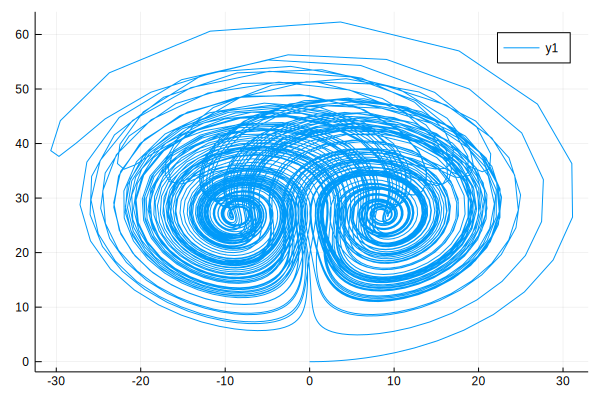

In [139]:
plot(y,z)

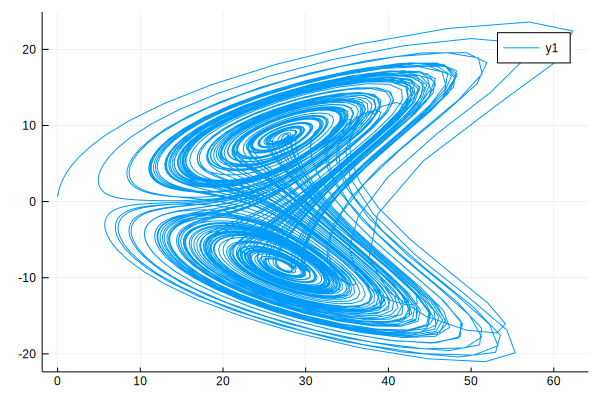

In [140]:
plot(z,x)

In [142]:
using BenchmarkTools
@btime solve_system(lorenz,[1.0,0.0,0.0],p,6000)

  532.429 μs (12012 allocations: 1.32 MiB)


5999-element Array{Any,1}:
 [1.0, 0.0, 0.0]                                              
 [0.8, 0.56, 0.0]                                             
 [0.752, 0.9968000000000001, 0.008960000000000001]            
 [0.80096, 1.3978492416000001, 0.023474005333333336]          
 [0.92033784832, 1.8180538219817644, 0.04461448495326095]     
 [1.099881043052353, 2.296260732619613, 0.07569952060880669]  
 [1.339156980965805, 2.864603692722823, 0.12217448583728006]  
 [1.6442463233172087, 3.5539673118971193, 0.19238159391549564]
 [2.026190521033191, 4.397339452147425, 0.2989931959555302]   
 [2.5004203072560376, 5.431943011293093, 0.4612438424853632]  
 [3.0867248480634486, 6.700473453723668, 0.7082869831520391]  
 [3.8094745691954923, 8.25130415895562, 1.0841620354518975]   
 [4.697840487147518, 10.136982080467158, 1.655002727352565]   
 ⋮                                                            
 [-4.625205198068402, -3.4809682773191617, 24.478704445612653]
 [-4.396357813918554, -3.737

# Ok lets try to speed this implementation up a little bit...
How fast can we get it??

Our base time is 532.429 micro seconds.

In [153]:
function speed_solve_system(f,u0,p,n)
    
    u = u0 
    #preallocate an array, rather than appending everytime. Saves us 9 microseconds.
    u_data = Vector{typeof(u0)}(undef,n)

    for i in 1:n-1
        append!(u_data, [u])
        u=f(u,p)   
    end
    return u_data
end

function speed_lorenz(u,p)
    α,σ,ρ,β = p
    α,σ,ρ,β = p
    du1 = u[1] + α*(σ*(u[2]-u[1]))
    du2 = u[2] + α*(u[1]*(ρ-u[3]) - u[2])
    du3 = u[3] + α*(u[1]*u[2] - β*u[3])
    [du1,du2,du3]
end

p = (0.02,10.0,28.0,8/3)
@btime speed_solve_system(speed_lorenz,[1.0,0.0,0.0],p,6000);

  525.226 μs (12002 allocations: 1.28 MiB)


In [151]:
532-523


9